References 
- https://dacon.io/competitions/official/235871/codeshare/4420?page=1&dtype=recent
- https://www.kaggle.com/frixinglife/airline-passenger-satisfaction

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
df_train = pd.read_csv('data/airplane/train.csv')
df_test = pd.read_csv('data/airplane/test.csv')

# Data Checking 

In [45]:
df_train.shape, df_test.shape

((103904, 25), (25976, 25))

In [46]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [47]:
# Unnamed:0 과 id 는 제외하고 분석합니다. 분류에 영향을 미치지 않음 
df_train = df_train.drop(df_train.iloc[:,[0, 1]], axis = 1)
df_test = df_test.drop(df_test.iloc[:,[0, 1]], axis = 1)

# 데이터 처리후 확인 
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [48]:
# 데이터 확인 :  Arrival Delay in Minutes feature 에 null 값이 존재함 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [49]:
# 결측치 확인하기 : 310개 있음 (Arrival Delay in Minutes feature)
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [50]:
# 결측치 확인하기 : 83개 있음 (Arrival Delay in Minutes feature)
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

### Data Categorize

In [51]:
# Feature들의 특징을 확인 : int 이지만 범주형인 경우가 있음
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [52]:
# 고유값 확인하기 - 범주형 
df_train["Gate location"].unique()

array([1, 3, 2, 5, 4, 0])

In [53]:
# 고유값 확인하기 - 수치형 
df_train["Flight Distance"].unique()

array([ 460,  235, 1142, ...,  974, 1479,  400])

In [54]:
# Categorize 
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df_train.iloc[:,categorical_indexes] = df_train.iloc[:,categorical_indexes].astype('category')

In [55]:
# 변환 확인 
df_train.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

# EDA

In [56]:
# Summary information about quantitative features 
df_train.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [57]:
# Summary of Categorical Features 
df_train.describe(include= ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


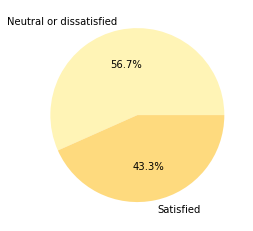

In [58]:
# Target variable (Satisfaction) 분포 확인 

plt.pie(df_train.satisfaction.value_counts(), 
    labels = ["Neutral or dissatisfied", "Satisfied"],
    colors = sns.color_palette("YlOrBr"), 
    autopct = '%1.1f%%')

pass

#### Total Features 

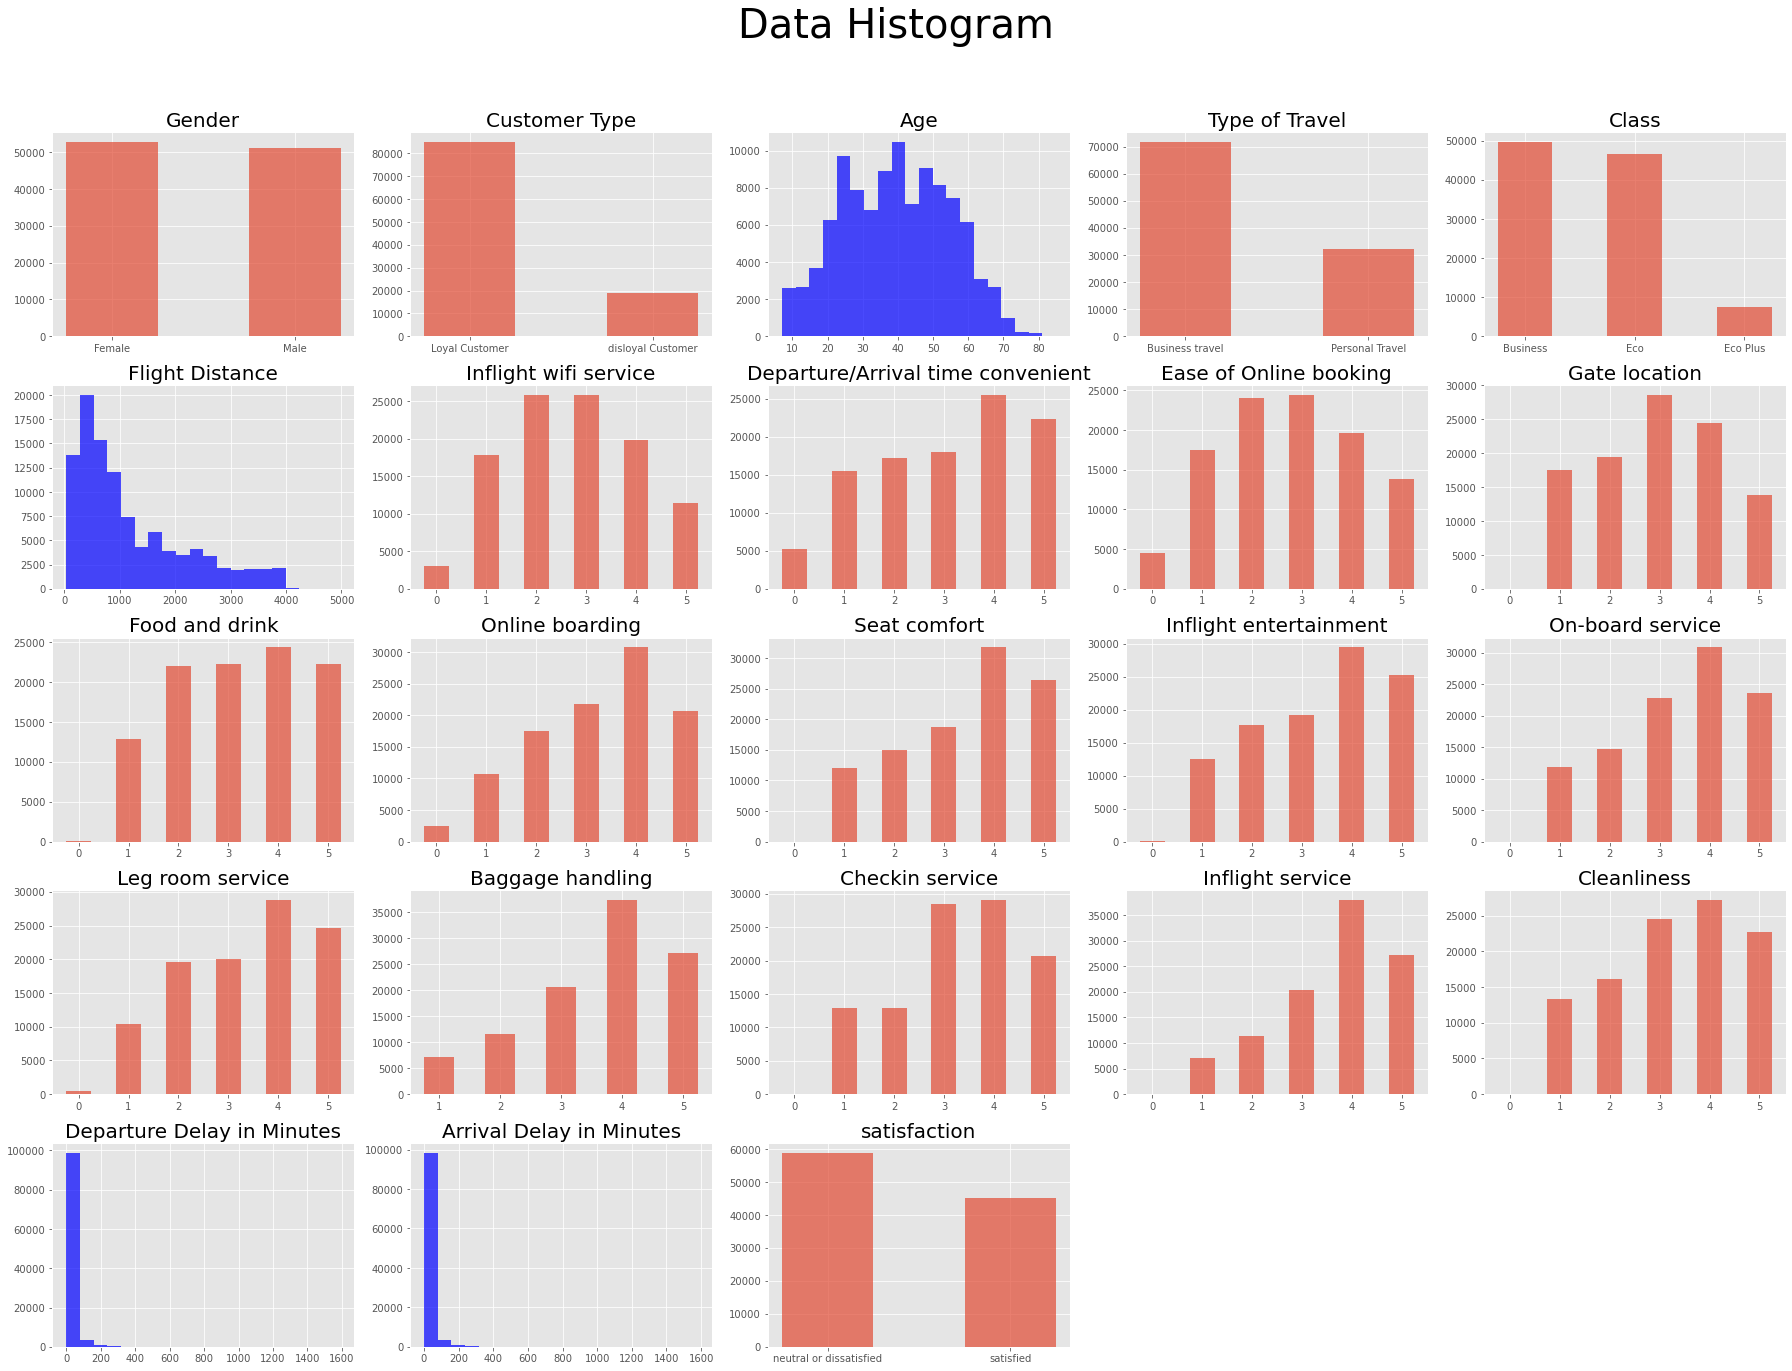

In [59]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = df_train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(df_train[cols[i]].unique()) > 20:
        plt.hist(df_train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = df_train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Data 해석해보기 
# 나이(age)는 정규 분포 형태
# 성별(sex)은 남자 여자 비율이 비슷
# Age를 제외한 연속형 변수들이 왼쪽으로 치우쳐져 있다는 것
# target은 약간 차이가 있지만 이정도면 심각한 imbalance는 아닌 듯 


#### Numerical Features

In [60]:
# Numerical Features 
# Correlation matrix 

corr_mat = df_train.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


<AxesSubplot:>

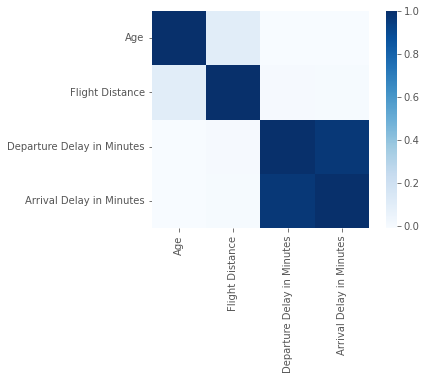

In [61]:
# Departure Delay & Arrival Delay : Strong Relationship 

sns.heatmap(corr_mat, square = True, cmap = 'Blues')

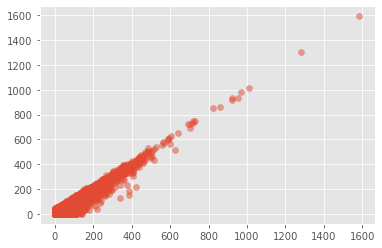

In [62]:
# Scatterplot으로 확인해보기 : 선형 관계
# 너무 당연한 말 : 늦게 출발하면 늦게 도착한다 
plt.scatter(df_train['Arrival Delay in Minutes'], df_train['Departure Delay in Minutes'], alpha = 0.5)

#### Categorical Features

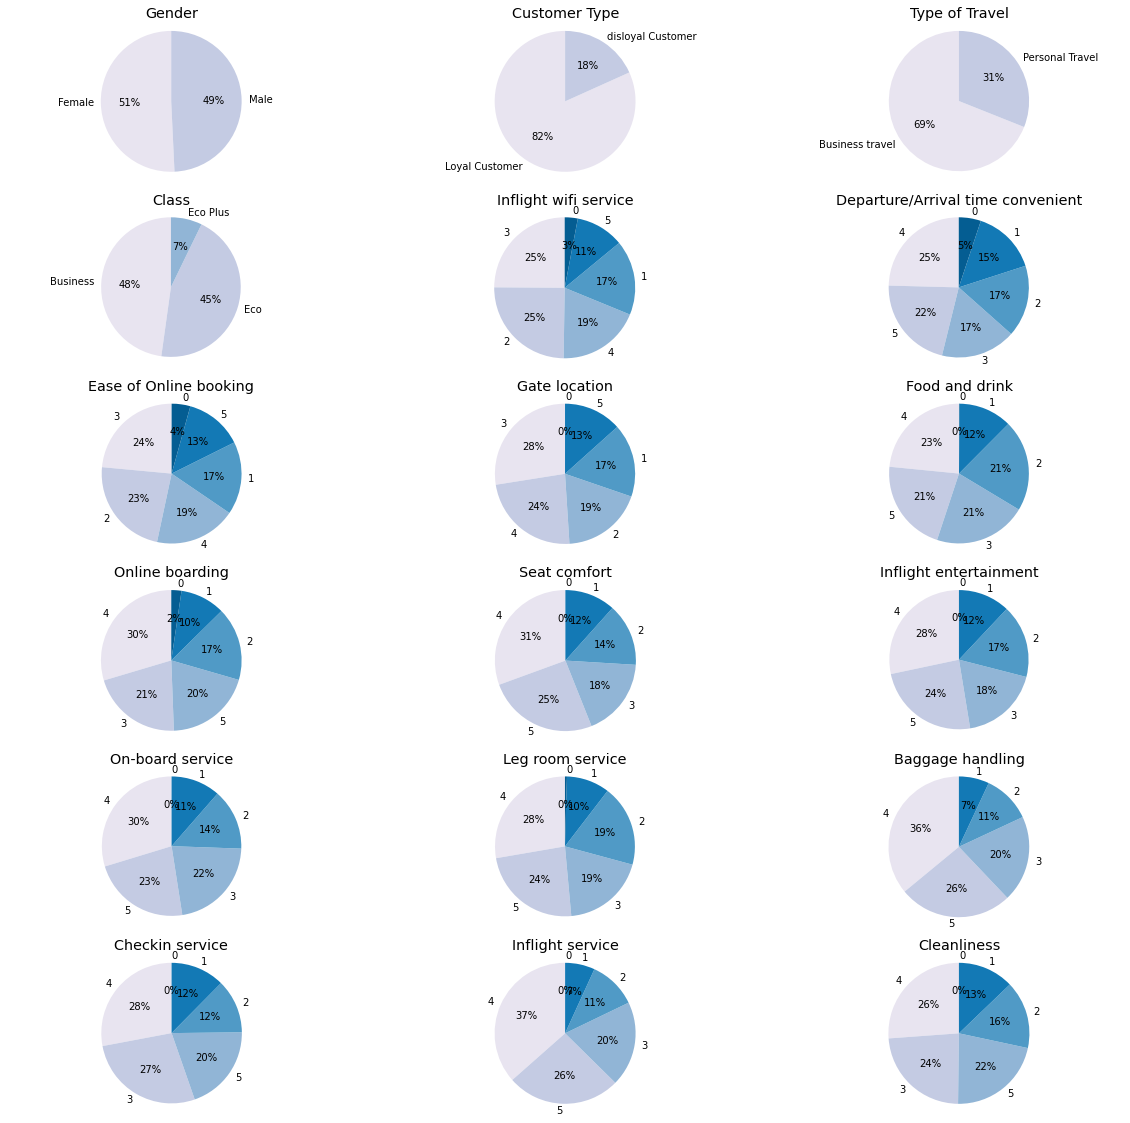

In [63]:
# Categorical Features 분포 확인하기 

categ = df_train.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df_train[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("PuBu"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

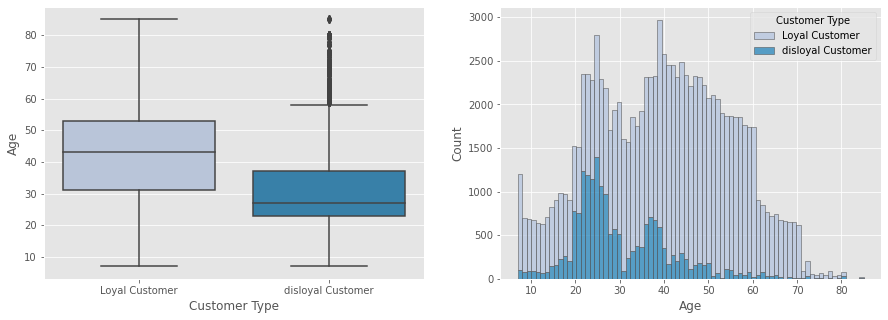

In [64]:
# 30 - 50세 연력이 가장 많음 
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "PuBu", data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Customer Type", multiple = "stack", palette = "PuBu", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

<AxesSubplot:xlabel='Age', ylabel='Count'>

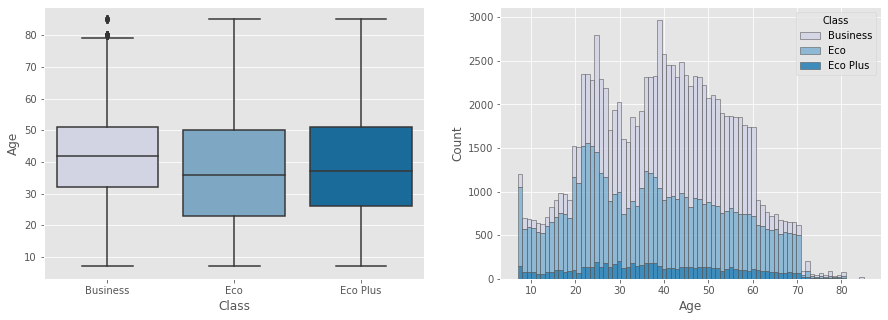

In [65]:
# Loyal Customer (Regular) tend to buy business class 

f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "PuBu", data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Class", multiple = "stack", palette = "PuBu", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

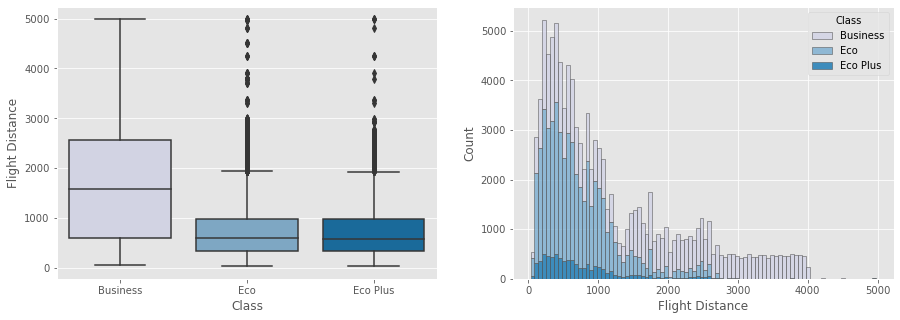

In [66]:
# 비행시간이 길면 business 많이 탄다 
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "PuBu", data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "PuBu", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

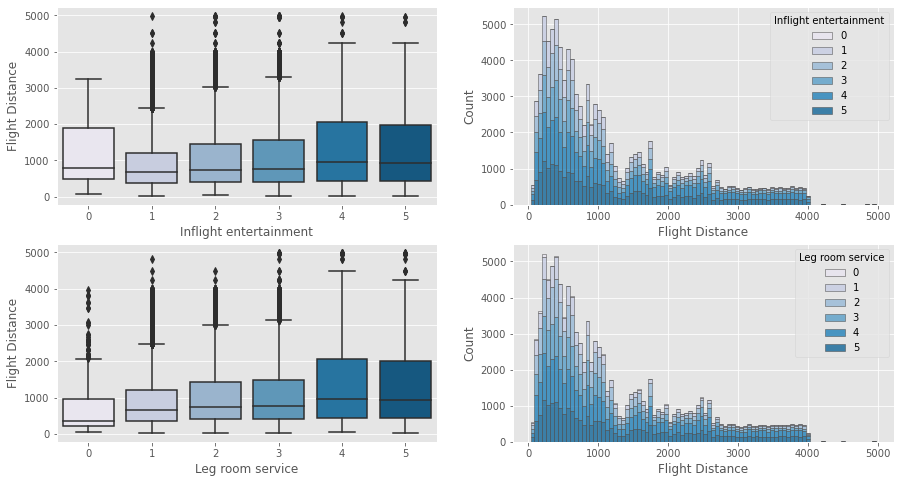

In [67]:
# 비행기에 머무르는 시간이 길면 만족도가 높은 듯 하다 
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "PuBu", data = df_train, ax = ax[0, 0])
sns.histplot(df_train, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "PuBu", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "PuBu", data = df_train, ax = ax[1, 0])
sns.histplot(df_train, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "PuBu", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

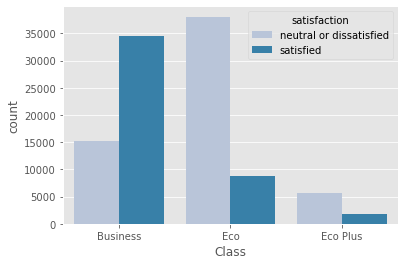

In [68]:
# target변수와 Class 관계 : 비즈니스 타면 만족도가 높고 그렇지 않은경우 불만족 (이것도 당연한 이야기..)

sns.countplot(x = 'Class', hue = 'satisfaction', palette = "PuBu", data = df_train)
plt.show()

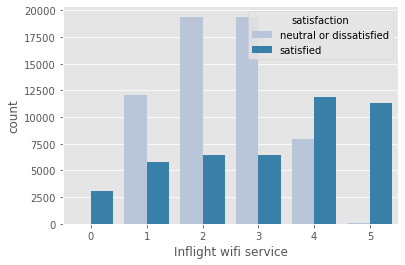

In [69]:
# target 변수와 Inflight Wifi : neutral이 많음, satisfied 한 사람은 5점 준다 

sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "PuBu", data = df_train)
plt.show()

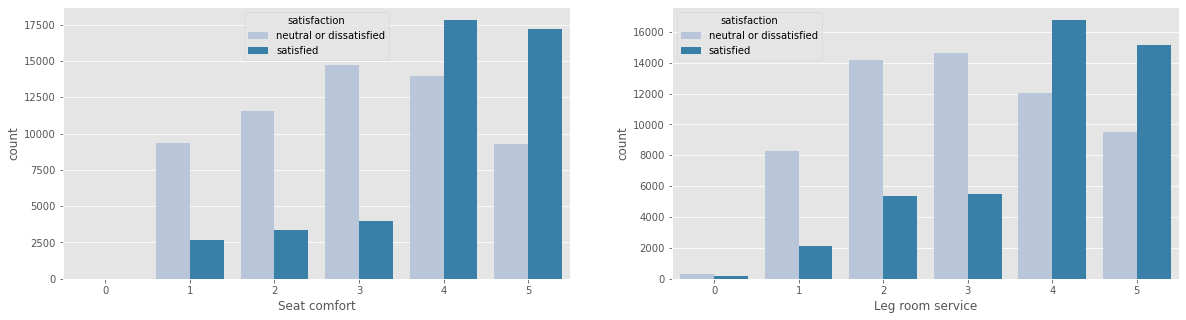

In [70]:
# 만족한 사람이 4- 5점을 주는 경우가 많다 

f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "PuBu", data = df_train,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "PuBu", data = df_train, ax = ax[1])
plt.show()

##### Total Relation 

In [103]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='category']] = corr_df[corr_df.columns[corr_df.dtypes=='category']].astype(str).apply(LabelEncoder().fit_transform)
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

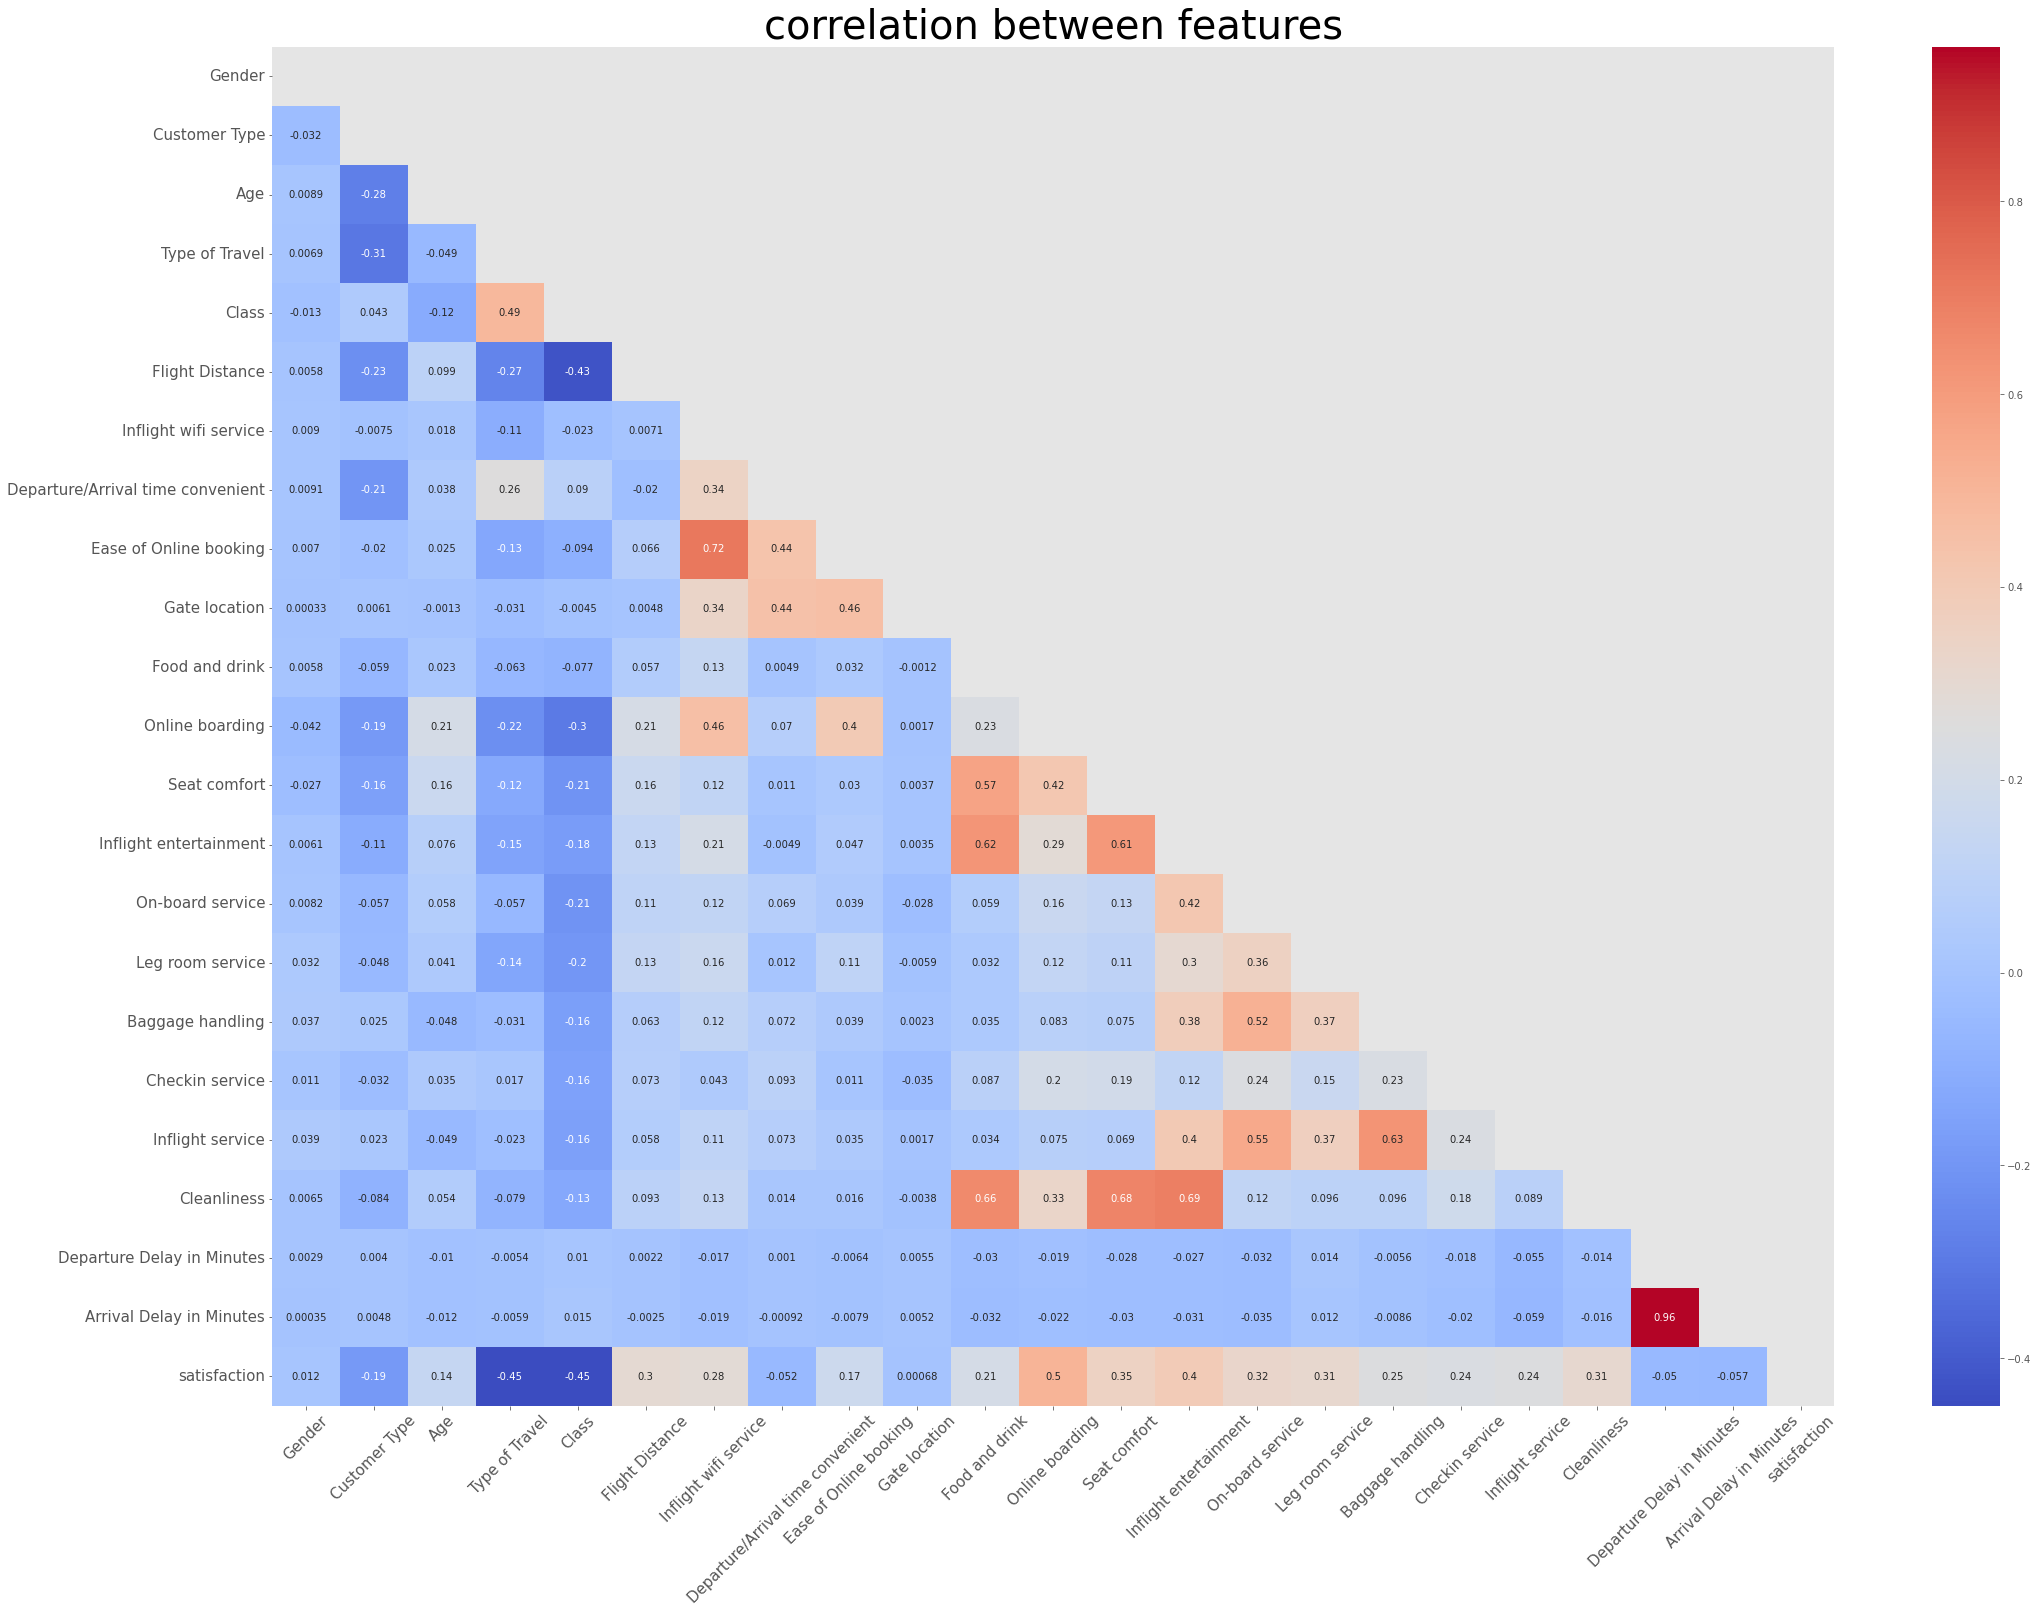

In [104]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# Data PreProcessing 

### 결측치 해결 

In [71]:
# 수치형은 median 으로 처리 

df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [72]:
# 결측치 해결 확인 
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [73]:
df_train.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


### Dividing Features 

In [74]:
# 수치형 
numerical_columns = [c for c in df_train.columns if df_train[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')

# 범주평 
categorical_columns = [c for c in df_train.columns if df_train[c].dtype.name == 'category']
data_describe = df_train.describe(include = ['category'])

In [75]:
# 범주형 세부적으로 나누기 

binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

print(f'Binary: {binary_columns}')
print(f'Non-Binary: {nonbinary_columns}')

Binary: ['Gender', 'Customer Type', 'Type of Travel']
Non-Binary: ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [76]:
# unique value 

for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in df_train[col].unique():
        if uniq == df_train[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


In [77]:
train = df_train.copy()

In [78]:
# Binarlization 
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for i in binary_columns:
    train[i] = lb.fit_transform(train[i])


In [79]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [80]:
# target 값도 숫자로 변환 
satisfaction= {'neutral or dissatisfied':0,'satisfied':1}

# apply using map
train['satisfaction'] = train['satisfaction'].map(satisfaction)

In [81]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [82]:
train_nonbinary = pd.get_dummies(train[nonbinary_columns])
print(train_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [83]:
len(train_nonbinary.columns)

86

In [84]:
# Normalization of quantitative features
train_numerical = train[numerical_columns]
train_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [85]:
# Standardization 

train_numerical = (train_numerical - train_numerical.mean(axis = 0))/train_numerical.std(axis = 0)

In [ ]:
# 방법 사용할 수 있는데, numpy.ndarry에러를 파악해야함 
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   

train_numerical = scaler.fit_transform(train_numerical)

In [86]:
target = train['satisfaction']
data = pd.concat((train_numerical, train_nonbinary, train[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


In [87]:
data.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
0,-1.745271,-0.731535,0.266391,0.074169,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,-0.951356,-0.957179,-0.361373,-0.236312,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,-0.885196,-0.047584,-0.387530,-0.391552,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.951356,-0.629243,-0.099805,-0.158692,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.430390,-0.978239,-0.387530,-0.391552,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [88]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365,0.492541,0.182678,0.310373
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138,0.499947,0.386404,0.462649
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Testing 

In [89]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [90]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [91]:
# test, train 분리 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(93513, 10391)

# 분류학습 

In [93]:
from sklearn.neighbors import KNeighborsClassifier

#### KNN 군집

In [94]:
#K-nearest neighbors (kNN) method : 분류방법 

knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 10)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)


Training sample error:  0.05251676237528472
Error on the test sample:  0.06544124723318256


#### Random Forest

In [95]:
from sklearn import ensemble

In [96]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  2.138740068225808e-05
Error on the test sample:  0.040708305264170914


In [97]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0
Error on the test sample:  0.03907227408334135
